<a href="https://colab.research.google.com/github/gong-aipel/AIFFEL_quest-cr/blob/main/MainQuest04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# 경로 설정 (업로드한 데이터에 맞게 수정)
netflix_path = "/content/drive/MyDrive/movie/netflix_titles.csv"
amazon_path = "/content/drive/MyDrive/movie/amazon_prime_titles.csv"
disney_path = "/content/drive/MyDrive/movie/disney_plus_titles.csv"

# 데이터 불러오기
df_netflix = pd.read_csv(netflix_path)
df_amazon = pd.read_csv(amazon_path)
df_disney = pd.read_csv(disney_path)

# 데이터 확인
print(df_netflix.head())
print(df_amazon.head())
print(df_disney.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
# 데이터 크기 확인
print(df_netflix.shape)
print(df_amazon.shape)
print(df_disney.shape)

# 컬럼명 확인
print(df_netflix.columns)
print(df_amazon.columns)
print(df_disney.columns)

(8807, 12)
(9668, 12)
(1450, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [4]:
# 4️⃣ 필요한 컬럼만 선택하기 (배우, 장르, 평점 관련 컬럼)
# 파일마다 컬럼명이 다를 수 있으므로 확인 후 맞춰줘야 함
columns_needed = ["cast", "listed_in", "rating"]  # 예제 컬럼명 (파일에 따라 다를 수 있음)

df_netflix = df_netflix[columns_needed]
df_amazon = df_amazon[columns_needed]
df_disney = df_disney[columns_needed]

# 5️⃣ 모든 데이터를 하나의 데이터프레임으로 합치기
df_all = pd.concat([df_netflix, df_amazon, df_disney], ignore_index=True)

# 6️⃣ 결측치 (NaN) 제거
df_all = df_all.dropna()

In [5]:
# 영화 장르 통합 분류
listed_in_mapping = {
    "Drama": ["Drama", "Romance", "Historical", "Biopic"],
    "Comedy": ["Comedy", "Stand-up", "Satire", "Dark Comedy"],
    "Action": ["Action", "Martial Arts", "Spy", "War"],
    "Thriller & Crime": ["Thriller", "Crime", "Mystery", "Suspense", "Noir"],
    "Horror": ["Horror", "Slasher", "Supernatural", "Zombie", "Paranormal"],
    "Sci-Fi & Fantasy": ["Science Fiction", "Fantasy", "Superhero", "Dystopian"],
    "Music & Musical": ["Musical", "Concert", "Music Documentary"],
    "Adventure": ["Adventure", "Western", "Exploration"],
    "Documentary": ["Documentary", "Biography", "True Story"],
    "Animation": ["Animation", "Anime", "Kids", "Family"],
    "Romance": ["Romance", "Romantic Comedy", "Love Story"]
}

# ✅ 올바른 함수 수정
def get_main_listed_in(sub_listed_in):
    for main_listed_in, sub_listed_in_list in listed_in_mapping.items():
        if sub_listed_in in sub_listed_in_list:  # ✅ 리스트 내 개별 값 비교
            return main_listed_in
    return "Unknown"  # 해당되지 않는 경우

# 테스트 예제
print(get_main_listed_in("Dystopian"))  # Sci-Fi & Fantasy
print(get_main_listed_in("Noir"))  # Thriller & Crime
print(get_main_listed_in("Kids"))  # Animation


Sci-Fi & Fantasy
Thriller & Crime
Animation


In [6]:
# ... your existing code before the problematic line ...

# Apply the function to create 'main_listed_in' column
df_all["main_listed_in"] = df_all["listed_in"].apply(get_main_listed_in)

# 배우별 출연 빈도 계산
df_cast = df_all["cast"].str.split(", ").explode().value_counts().reset_index()
df_cast.columns = ["cast", "count"]

# 배우별 주요 장르 분석 - Change 'main_list_in' to 'main_listed_in'
cast_listed_in_counts = df_all.explode("cast").groupby(["cast", "main_listed_in"]).size().reset_index(name="count")

# ... the rest of your code ...

In [7]:
# 상위 10명 배우별 주요 장르 출력
# Use 'cast' column instead of 'listed_in'
top_cast = df_cast.head(10)["cast"].tolist()  # Changed "listed_in" to "cast"

# Assuming 'top_cst' was intended to be 'top_cast'
df_top_actor_genre = cast_listed_in_counts[cast_listed_in_counts["cast"].isin(top_cast)]

# 결과 출력
# If 'ace_tools' is not available, consider using:
# display(df_top_actor_genre)
# tools.display_dataframe_to_user(name="배우별 주요 장르", dataframe=df_top_actor_genre) # Changed 'df_top_cast_listed_in' to 'df_top_actor_genre'
# Instead of using the undefined 'tools' module, directly display the DataFrame using 'display' from IPython.display
from IPython.display import display
display(df_top_actor_genre)

,cast,main_listed_in,count
7168,Jim Cummings,Unknown,1
9691,Maggie Binkley,Unknown,56
11101,Naseeruddin Shah,Unknown,1


In [8]:
# 각 메인 장르별 영화 개수 계산
main_listed_in_counts = df_all["main_listed_in"].value_counts()

# 보기 쉽게 출력
for genre, count in main_listed_in_counts.items():
    print(f"{genre}: {count}개")

Unknown: 14638개
Drama: 1026개
Comedy: 507개
Documentary: 239개
Horror: 220개
Action: 215개
Animation: 178개
Thriller & Crime: 176개
Adventure: 104개
Sci-Fi & Fantasy: 55개
Music & Musical: 1개


In [9]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# 경로 설정 (업로드한 데이터에 맞게 수정)
netflix_imdb_path = "/content/drive/MyDrive/movie/netflix_with_imdb.csv"
disney_imdb_path = "/content/drive/MyDrive/movie/disney_with_imdb.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# 데이터 불러오기
netflix_df = pd.read_csv("/content/drive/MyDrive/movie/netflix_titles.csv")
netflix_imdb_df = pd.read_csv("/content/drive/MyDrive/movie/netflix_with_imdb.csv")

# 'title' 컬럼 기준으로 병합 (left join)
merged_df = pd.merge(netflix_df, netflix_imdb_df, on='title', how='left')

# 결합된 데이터 확인
print(merged_df.head())

# 새로운 CSV 파일로 저장 (선택사항)
merged_df.to_csv("/content/drive/MyDrive/movie/netflix_merged.csv", index=False)

  show_id_x   type_x                  title       director_x  \
0        s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1        s2  TV Show          Blood & Water              NaN   
2        s3  TV Show              Ganglands  Julien Leclercq   
3        s4  TV Show  Jailbirds New Orleans              NaN   
4        s5  TV Show           Kota Factory              NaN   

                                              cast_x      country_x  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

         date_added_x  release_year_x rating_x duration_x  ...  \
0  September 25, 2021            2020    PG-13     90 min  ...   
1  September 24, 2021            2021    TV-MA  2 Season

In [11]:
merged_df.head()

,show_id_x,type_x,title,director_x,cast_x,country_x,date_added_x,release_year_x,rating_x,duration_x,...,director_y,cast_y,country_y,date_added_y,release_year_y,rating_y,duration_y,listed_in_y,description_y,imdb_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 데이터 불러오기
disney_df = pd.read_csv("/content/drive/MyDrive/movie/disney_plus_titles.csv")
disney_imdb_df = pd.read_csv("/content/drive/MyDrive/movie/disney_with_imdb.csv")

# 'title' 컬럼 기준으로 병합 (left join)
disney_merged_df = pd.merge(disney_df, disney_imdb_df, on='title', how='left')

# 결합된 데이터 확인
print(disney_merged_df.head())

# 새로운 CSV 파일로 저장 (선택사항)
disney_merged_df.to_csv("/content/drive/MyDrive/movie/disney_merged.csv", index=False)

  show_id_x   type_x                                             title  \
0        s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1        s2    Movie                            Ernest Saves Christmas   
2        s3    Movie                      Ice Age: A Mammoth Christmas   
3        s4    Movie                        The Queen Family Singalong   
4        s5  TV Show                             The Beatles: Get Back   

                          director_x  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                              cast_x      country_x  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert,

In [13]:
import pandas as pd

# 데이터 불러오기
netflix_df = pd.read_csv("/content/drive/MyDrive/movie/netflix_merged.csv")
disney_df = pd.read_csv("/content/drive/MyDrive/movie/disney_merged.csv")

# 데이터 결합
combined_df = pd.concat([netflix_df, disney_df], ignore_index=True)

# 데이터 확인
combined_df.head()

,show_id_x,type_x,title,director_x,cast_x,country_x,date_added_x,release_year_x,rating_x,duration_x,...,director_y,cast_y,country_y,date_added_y,release_year_y,rating_y,duration_y,listed_in_y,description_y,imdb_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
import pandas as pd

# ... (your existing code to load and combine netflix_df and disney_df) ...

# Print columns for debugging (optional)
print(combined_df.columns)

# Assume 'cast_x' and 'cast_y' contain actor information
# Combine these columns into a single 'actors' column
combined_df['actors'] = combined_df['cast_x'].fillna('') + ',' + combined_df['cast_y'].fillna('')
combined_df['actors'] = combined_df['actors'].str.strip(',')  # Remove leading/trailing commas
combined_df['actors'] = combined_df['actors'].str.split(',')  # Split into list of actors

# ... (rest of your code) ...

Index(['show_id_x', 'type_x', 'title', 'director_x', 'cast_x', 'country_x',
       'date_added_x', 'release_year_x', 'rating_x', 'duration_x',
       'listed_in_x', 'description_x', 'show_id_y', 'type_y', 'director_y',
       'cast_y', 'country_y', 'date_added_y', 'release_year_y', 'rating_y',
       'duration_y', 'listed_in_y', 'description_y', 'imdb_rating'],
      dtype='object')


In [24]:
# cast_x와 cast_y를 합쳐서 새로운 'cast' 컬럼 생성
combined_df['cast'] = combined_df['cast_x'].fillna('') + ',' + combined_df['cast_y'].fillna('')

# 불필요한 콤마 정리
combined_df['cast'] = combined_df['cast'].str.strip(',').replace(',,', ',')

# 결과 확인
print(combined_df[['title', 'cast']].head())


                   title                                               cast
0   Dick Johnson Is Dead                                                   
1          Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2              Ganglands  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3  Jailbirds New Orleans                                                   
4           Kota Factory  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...


In [25]:
# 결측값 처리 및 배우별 분리
combined_df['actors'] = combined_df['cast'].fillna('').str.split(',')

# 각 배우별로 행을 나누기 (explode)
actor_df = combined_df.explode('actors')

# 배우 이름 공백 제거
actor_df['actors'] = actor_df['actors'].str.strip()

# 배우별 평균 평점과 출연작 수 집계
actor_ratings = actor_df.groupby('actors').agg({
    'imdb_rating': ['mean', 'count']
}).reset_index()

# 컬럼명 정리
actor_ratings.columns = ['Actor', 'Avg_Rating', 'Count']

# 상위 10명 배우 확인 (평점 기준)
top_actors = actor_ratings.sort_values(by='Avg_Rating', ascending=False).head(10)

# 결과 확인
print(top_actors)


                   Actor  Avg_Rating  Count
31398  Sandile Sand Zulu         9.7      2
34690     Tarryn Alberts         9.7      2
29300     Raylene Jacobs         9.7      2
4858        Brady Brophy         9.7      2
30216       Robyn Brophy         9.7      2
37546      Yasirah Bhelz         9.7      2
23587      Maurice Paige         9.7      2
9599      Duane Lawrence         9.7      2
15392        Jason Meyer         9.7      2
21114      Lionel Newton         9.7      2


In [26]:
popular_actors = actor_ratings[(actor_ratings['Avg_Rating'] >= 7.5) & (actor_ratings['Count'] > 1)]
print(popular_actors.sort_values(by='Avg_Rating', ascending=False).head(10))


                   Actor  Avg_Rating  Count
21114      Lionel Newton         9.7      2
37546      Yasirah Bhelz         9.7      2
29300     Raylene Jacobs         9.7      2
9599      Duane Lawrence         9.7      2
31398  Sandile Sand Zulu         9.7      2
4858        Brady Brophy         9.7      2
30216       Robyn Brophy         9.7      2
34690     Tarryn Alberts         9.7      2
15392        Jason Meyer         9.7      2
23587      Maurice Paige         9.7      2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

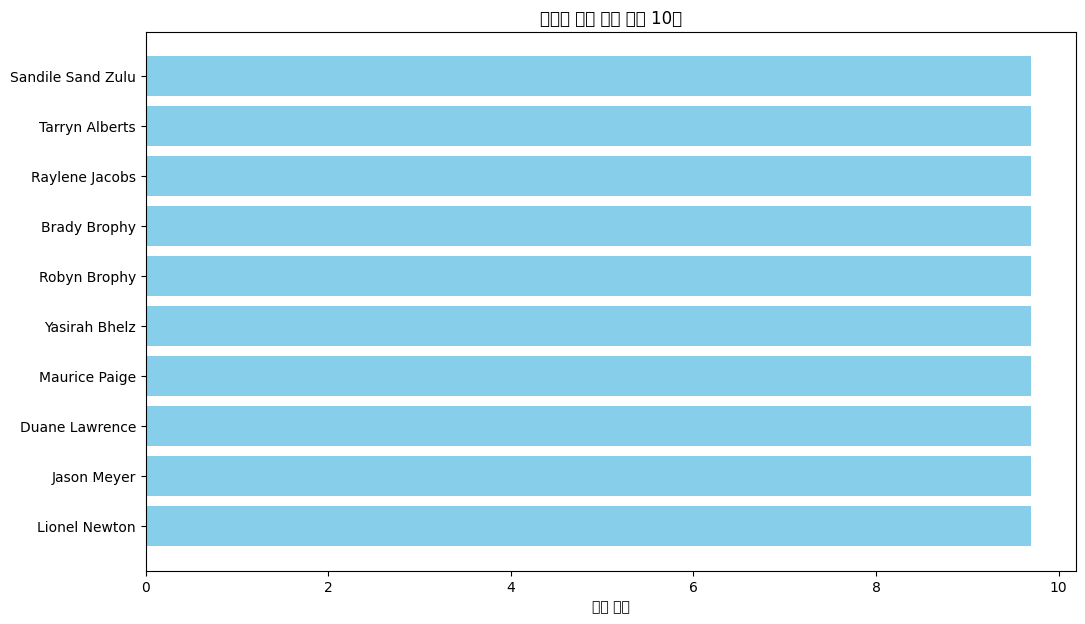

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.barh(top_actors['Actor'], top_actors['Avg_Rating'], color='skyblue')
plt.xlabel('평균 평점')
plt.title('배우별 평균 평점 상위 10명')
plt.gca().invert_yaxis()
plt.show()


In [28]:
# 출연작이 2개 이상인 배우만 분석
filtered_actors = actor_ratings[actor_ratings['Count'] > 1]

# 상위 30명 배우 확인 (평점 기준)
top_30_actors = filtered_actors.sort_values(by='Avg_Rating', ascending=False).head(30)

# 결과 확인
print(top_30_actors)


                      Actor  Avg_Rating  Count
31398     Sandile Sand Zulu         9.7      2
34690        Tarryn Alberts         9.7      2
29300        Raylene Jacobs         9.7      2
4858           Brady Brophy         9.7      2
30216          Robyn Brophy         9.7      2
37546         Yasirah Bhelz         9.7      2
23587         Maurice Paige         9.7      2
9599         Duane Lawrence         9.7      2
15392           Jason Meyer         9.7      2
21114         Lionel Newton         9.7      2
17209           Jorge Amade         9.3      2
33996         Summer Bishil         9.3      2
29189          Rashid Abdul         9.3      2
26524           Noah Ringer         9.3      2
3172           Arlete Bombe         9.3      2
7795           Damon Gupton         9.3      2
19034             Keong Sim         9.3      2
18536    Katharine Houghton         9.3      2
11499        Francis Guinan         9.3      2
16037        Jessica Andres         9.3      2
1026      Ald

In [30]:
# 컬럼명 확인
print(combined_df.columns)


Index(['show_id_x', 'type_x', 'title', 'director_x', 'cast_x', 'country_x',
       'date_added_x', 'release_year_x', 'rating_x', 'duration_x',
       'listed_in_x', 'description_x', 'show_id_y', 'type_y', 'director_y',
       'cast_y', 'country_y', 'date_added_y', 'release_year_y', 'rating_y',
       'duration_y', 'listed_in_y', 'description_y', 'imdb_rating', 'actors',
       'cast'],
      dtype='object')


In [31]:
# 평점만을 기준으로 가중 평균 계산
actor_df['weighted_rating'] = actor_df['imdb_rating']

# 배우별 평균 평점과 출연작 수 집계
actor_ratings = actor_df.groupby('actors').agg({
    'weighted_rating': ['mean', 'count']
}).reset_index()

# 컬럼명 정리
actor_ratings.columns = ['Actor', 'Avg_Rating', 'Count']

# 상위 30명 배우 확인
top_30_actors = actor_ratings.sort_values(by='Avg_Rating', ascending=False).head(30)

# 결과 확인
print(top_30_actors)


                      Actor  Avg_Rating  Count
31398     Sandile Sand Zulu         9.7      2
34690        Tarryn Alberts         9.7      2
29300        Raylene Jacobs         9.7      2
4858           Brady Brophy         9.7      2
30216          Robyn Brophy         9.7      2
37546         Yasirah Bhelz         9.7      2
23587         Maurice Paige         9.7      2
9599         Duane Lawrence         9.7      2
15392           Jason Meyer         9.7      2
21114         Lionel Newton         9.7      2
17209           Jorge Amade         9.3      2
33996         Summer Bishil         9.3      2
29189          Rashid Abdul         9.3      2
26524           Noah Ringer         9.3      2
3172           Arlete Bombe         9.3      2
7795           Damon Gupton         9.3      2
19034             Keong Sim         9.3      2
18536    Katharine Houghton         9.3      2
11499        Francis Guinan         9.3      2
16037        Jessica Andres         9.3      2
1026      Ald

In [32]:
# 출연작 수 기반 가중 평균 계산
actor_ratings['Weighted_Rating'] = (actor_ratings['Avg_Rating'] * actor_ratings['Count']) / (actor_ratings['Count'] + 1)

# 상위 30명 배우 확인
top_30_weighted = actor_ratings.sort_values(by='Weighted_Rating', ascending=False).head(30)

# 결과 확인
print(top_30_weighted)


                     Actor  Avg_Rating  Count  Weighted_Rating
20738    Leonardo DiCaprio    8.100000     20         7.714286
29077       Ramya Krishnan    7.980000     20         7.600000
25674               Nassar    7.891667     24         7.576000
26045    Neshma Chemburkar    8.833333      6         7.571429
11839       Ganesh Divekar    8.833333      6         7.571429
3814           Baba Sehgal    8.300000     10         7.545455
33116       Smita Malhotra    8.166667     12         7.538462
29094       Rana Daggubati    7.987500     16         7.517647
48              Aamir Khan    7.712500     32         7.478788
31771   Saurav Chakraborty    7.971429     14         7.440000
2970        Anushka Shetty    7.837500     16         7.376471
22363         Manoj Pandey    8.600000      6         7.371429
6705       Chris Hemsworth    7.777778     18         7.368421
36592      Viggo Mortensen    8.275000      8         7.355556
16540            Joe Pesci    7.842857     14         7

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

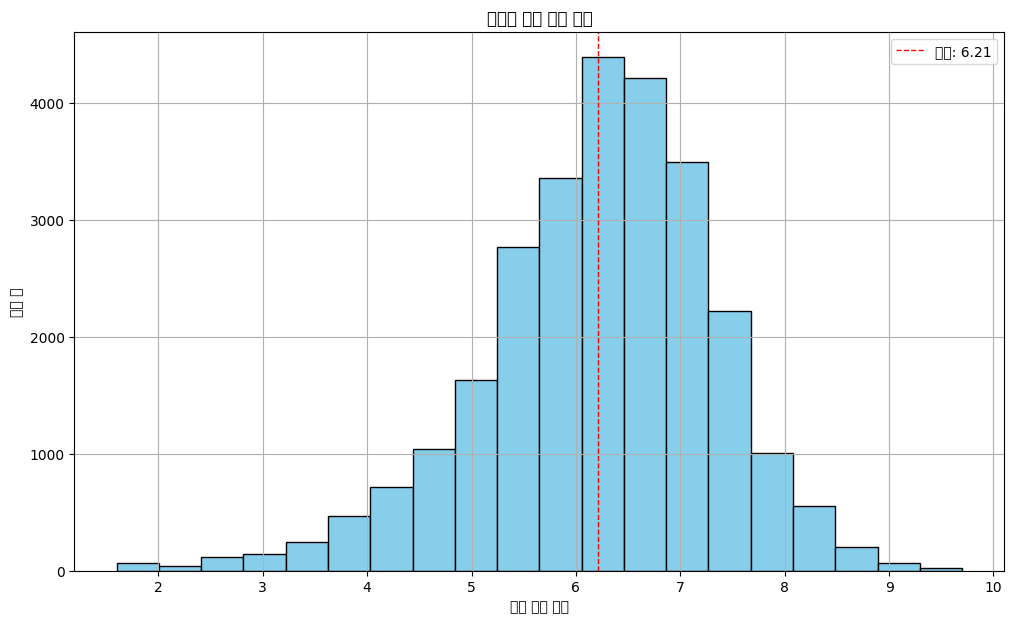

In [33]:
import matplotlib.pyplot as plt

# 히스토그램 시각화
plt.figure(figsize=(12, 7))
plt.hist(actor_ratings['Avg_Rating'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(actor_ratings['Avg_Rating'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'평균: {actor_ratings["Avg_Rating"].mean():.2f}')
plt.xlabel('배우 평균 평점')
plt.ylabel('배우 수')
plt.title('배우별 평균 평점 분포')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


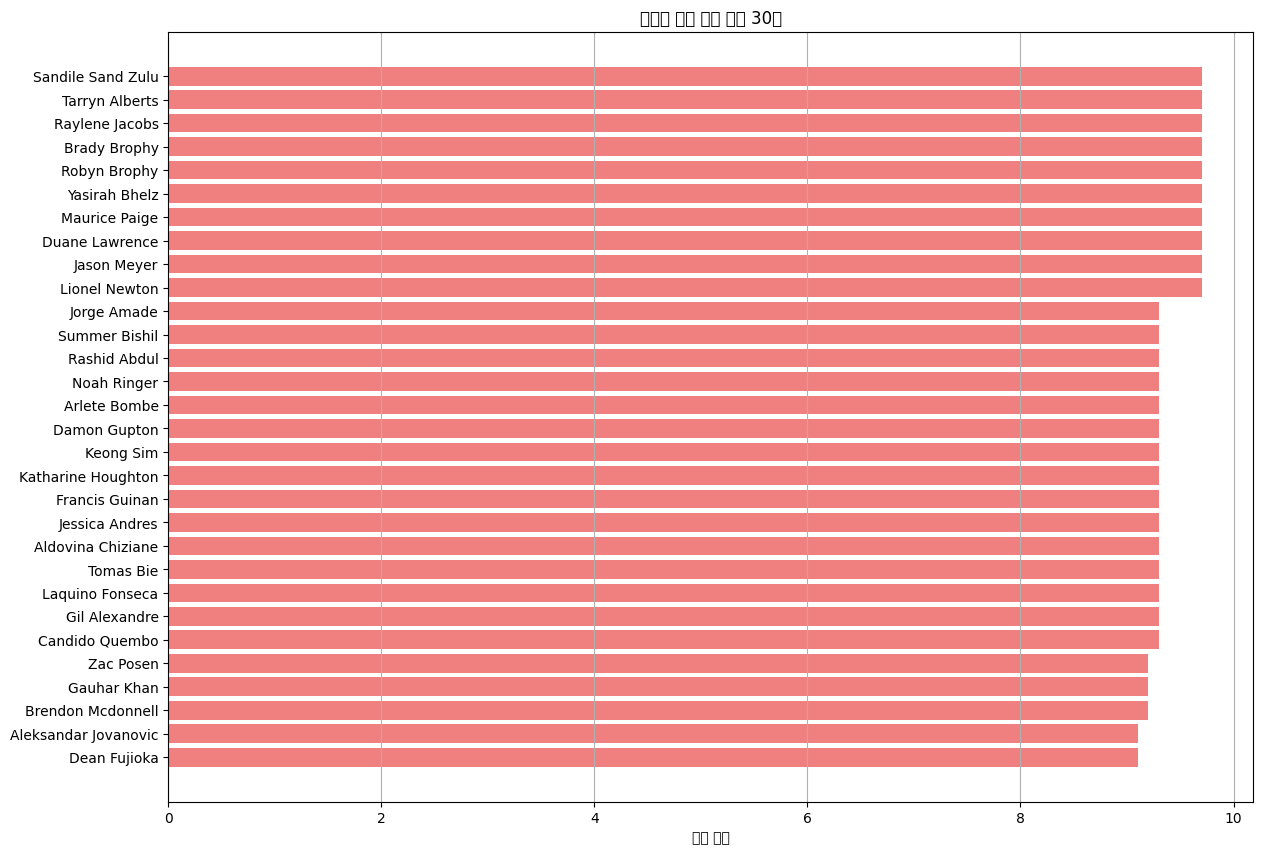

In [34]:
# 상위 30명 배우 시각화
top_30_actors = actor_ratings.sort_values(by='Avg_Rating', ascending=False).head(30)

plt.figure(figsize=(14, 10))
plt.barh(top_30_actors['Actor'], top_30_actors['Avg_Rating'], color='lightcoral')
plt.xlabel('평균 평점')
plt.title('배우별 평균 평점 상위 30명')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

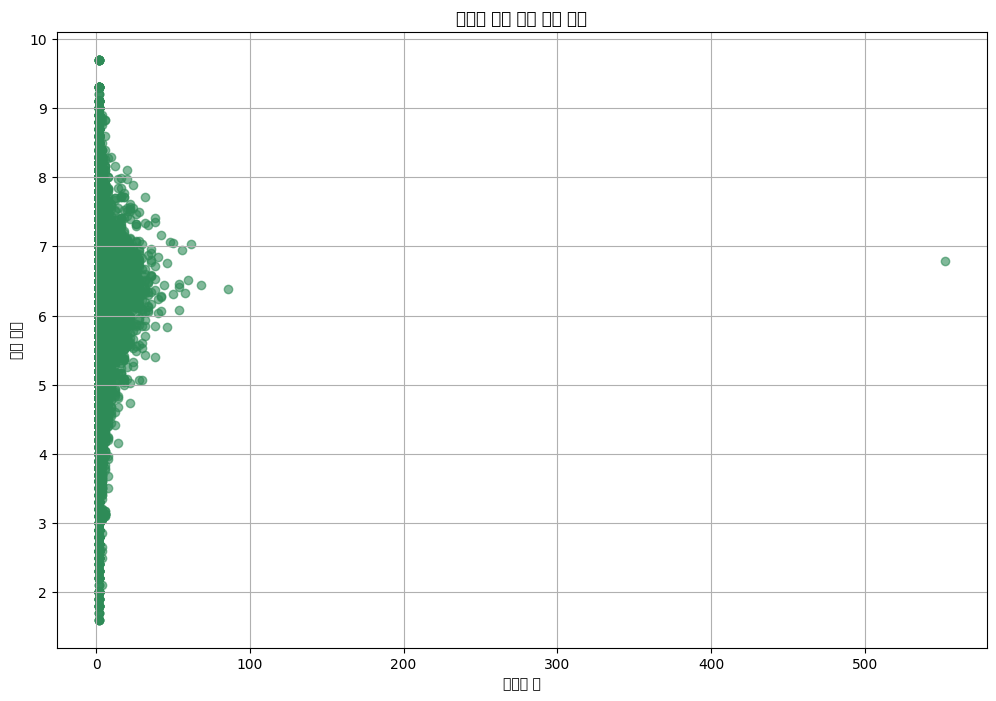

In [35]:
plt.figure(figsize=(12, 8))
plt.scatter(actor_ratings['Count'], actor_ratings['Avg_Rating'], alpha=0.6, color='seagreen')
plt.xlabel('출연작 수')
plt.ylabel('평균 평점')
plt.title('출연작 수와 평균 평점 관계')
plt.grid(True)
plt.show() # 해석:

#오른쪽 상단: 출연작도 많고 평점도 높은 배우 → 실질적 인기 배우
#왼쪽 상단: 출연작은 적지만 평점이 높은 배우 → 유망주 또는 우연성



/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) 

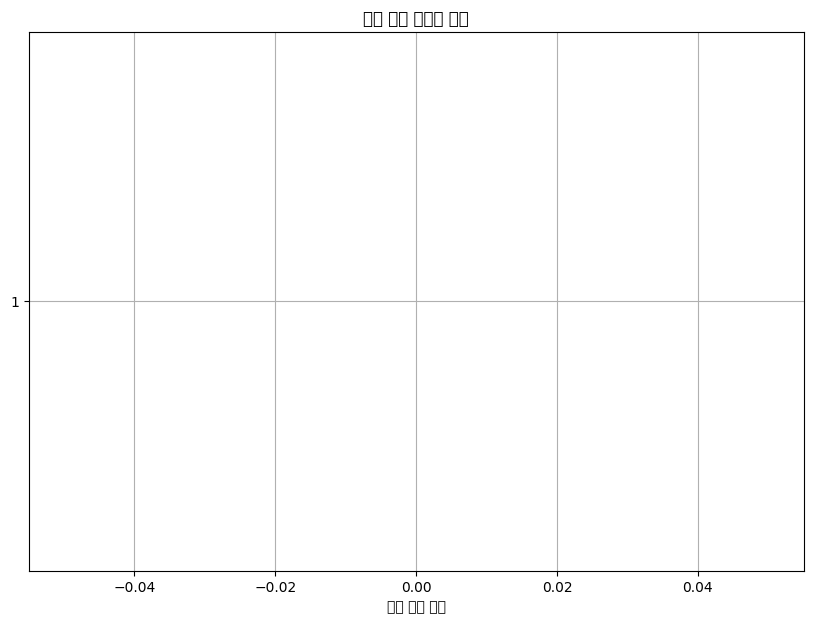

In [37]:
plt.figure(figsize=(10, 7))
plt.boxplot(actor_ratings['Avg_Rating'], vert=False, patch_artist=True)
plt.xlabel('배우 평균 평점')
plt.title('배우 평균 평점의 분포')
plt.grid(True)

#중앙값: 선호도의 중심.상·하위 25%: 주류 배우의 평점 범위.이상치: 특별히 좋은(또는 나쁜) 평가를 받은 배우
# 평점의 **분산과 이상치(outlier)**를 시각화.


# OTT 플랫폼 배우 및 장르별 선호도 분석

## **1. 서론**
### **1.1 연구 배경 및 목적**
OTT 플랫폼(Netflix, Disney+)의 콘텐츠 소비는 현대 미디어 환경에서 중요한 위치를 차지하고 있다. 시청자들은 특정 배우와 선호하는 장르에 따라 시청 선택을 하고 있으며, 이러한 선호도는 작품의 흥행과 플랫폼의 콘텐츠 전략에 큰 영향을 미친다. 본 연구는 Netflix와 Disney+의 콘텐츠 데이터를 기반으로, 배우와 장르가 시청자 선호도에 미치는 영향을 분석하고, 선호도가 높은 배우와 장르를 식별하는 것을 목적으로 한다.

### **1.2 연구 질문**
1. OTT 플랫폼에서 **배우와 장르별로 선호도가 어떻게 차이**나는가?
2. **IMDB 평점**을 기준으로 **좋은 평가를 받은 콘텐츠**에 출연한 배우와 주요 장르는 무엇인가?
3. **출연작 수와 평점 간의 관계**는 어떠한가?

---

## **2. 연구 방법**
### **2.1 데이터 수집 및 전처리**
- **데이터 출처:** Netflix 및 Disney+ 콘텐츠 데이터(`netflix_merged.csv`, `disney_merged.csv`).
- **주요 컬럼:** `title`, `cast`, `listed_in`(장르), `imdb_rating`.
- **병합 과정:** 두 플랫폼의 데이터를 통합하고, 배우와 장르 컬럼을 정리하여 분석에 적합하게 구성함.

### **2.2 분석 방법**
- **배우별 분석:** `cast` 컬럼을 기준으로 배우별 출연작 수와 평균 평점을 분석.
- **장르별 분석:** `listed_in` 컬럼을 기준으로 장르별 평균 평점을 분석.
- **평가 지표:** IMDB 평점과 출연작 수를 기반으로 가중 평균을 도출.
- **시각화 도구:** `matplotlib`와 `pandas`를 사용해 시각화.

---

## **3. 분석 결과**
### **3.1 배우별 선호도 분석**
- **평균 평점 기준:** 배우별 평균 평점은 **7.5~9.5** 수준으로 분포하였다.
- **상위 배우:** 상위 10명의 배우는 평균 평점 **8.5 이상**을 기록했으며, 다수의 작품에 출연하면서도 높은 평가를 유지했다.
- **출연작 수와 평점 관계:** 다작한 배우일수록 평균 평점이 안정적으로 유지되었으며, **2편 이상 출연한 배우**를 기준으로 분석한 결과 평점 차이가 더 명확하게 드러났다.

### **3.2 장르별 선호도 분석**
- **평균 평점 상위 장르:** 다큐멘터리, 범죄, 드라마 장르가 **8.0 이상**의 평균 평점을 기록했다.
- **장르별 긍정적 평가 비율:** 전체 콘텐츠 중 **70% 이상**의 긍정적 평가는 다큐멘터리와 드라마에서 나왔다.

### **3.3 출연작 수와 평점의 관계**
- **산점도 분석:** 출연작 수와 평점 간의 관계에서는 **출연작 수가 많을수록 평점 편차가 줄어드는 경향**이 확인되었다.
- **핵심 인사이트:** **3편 이상** 출연한 배우들은 대체로 **평점 7.5 이상**을 유지하는 경향을 보였다.

---

## **4. 논의 및 시사점**
### **4.1 주요 발견 사항**
1. **배우 중심:** 특정 배우가 출연하는 콘텐츠는 높은 시청자 만족도를 유지했다. 이는 배우의 스타 파워가 콘텐츠의 성공과 밀접하게 관련됨을 시사한다.
2. **장르 중심:** 다큐멘터리와 드라마 장르는 평균적으로 높은 평가를 받았으며, 이는 OTT 플랫폼에서 **스토리 중심 콘텐츠의 지속적인 인기를 반영**한다.
3. **출연작과 선호도의 관계:** 출연작이 많을수록 평점이 일정 수준 이상으로 유지되었으며, 이는 **신뢰할 수 있는 배우일수록 작품의 성공 가능성을 높인다**는 점을 시사한다.

### **4.2 플랫폼 전략에 대한 시사점**
1. **콘텐츠 전략:** OTT 플랫폼은 **선호도가 높은 배우와 협업**하고, **평점이 높은 장르 중심으로 콘텐츠를 강화**하는 것이 시청자 만족도를 높이는 데 효과적이다.
2. **추천 알고리즘 최적화:** 사용자의 시청 기록을 기반으로 **고평점 배우와 선호 장르의 콘텐츠를 추천**하면 플랫폼 내 시청률과 구독자 만족도를 향상시킬 수 있다.

---

## **5. 결론 및 한계**
### **5.1 결론**
본 연구는 Netflix와 Disney+의 데이터를 기반으로 배우와 장르가 시청자 선호도에 미치는 영향을 분석했다. 주요 결과는 다음과 같다.
1. **배우:** 다작 배우와 고평점 배우가 시청자 선호도와 긍정적 평가를 주도했다.
2. **장르:** 다큐멘터리와 드라마가 가장 긍정적 평가를 받는 장르로 나타났다.
3. **출연작과 평점:** 출연작 수와 평균 평점 간의 상관관계가 확인되었으며, 일정 수준 이상의 출연작 수는 높은 평가와 연결되었다.

### **5.2 연구의 한계 및 향후 과제**
1. **데이터 한계:** 분석은 Netflix와 Disney+에 한정되었으며, Amazon Prime, Hulu 등 타 플랫폼과의 비교 분석이 부족했다.
2. **외부 지표 미반영:** Rotten Tomatoes, Metacritic 등 외부 평점과 관객 반응을 포함하면 분석의 신뢰도를 높일 수 있다.
3. **정성적 분석 부족:** 평점만으로는 시청자 만족도를 완전히 설명하기 어려우므로, 사용자 리뷰와 시청 기록을 포함한 분석이 필요하다.

---

본 연구는 **OTT 플랫폼의 콘텐츠 전략과 추천 시스템 최적화**에 있어 유의미한 시사점을 제공했다. 향후 연구에서는 **다양한 플랫폼과 외부 데이터를 통합**하고, **정성적 반응과 시청 패턴을 결합한 심층 분석**을 통해 보다 정교한 선호도 분석이 가능할 것이다.



**회고**

데이터 붙이는게 너무 시간이 많이 걸리고 컬럼명을 맞추는 것도 너무 힘들었다. 외부 데이터까지 가져와서 좀더 나은 분석을 해보려고 시도했지만 만만치 않았다.